In [134]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

from kaggle_environments import make, evaluate

Опишем поведение Агентов, всегда играющих что-то одно.

In [135]:
def rock_agent(observation, configuration):
    return 0


In [136]:
def paper_agent(observation, configuration):
    return 1

In [137]:
def scissors_agent(observation, configuration):
    return 2

Агент случайным образом выбирает одно из трех действий.

In [138]:
def random_agent(observation, configuration):
    return random.randrange(0, configuration.signs)

Агент поочередно выбирает камень, ножницы и бумагу

In [139]:
def cycle_agent(observation, configuration):
    return observation.step % 3

Агент выбирает каждое действие с определенной вероятностью

In [140]:
def probabilistic_agent(observation, configuration):
    import random
    probabilities = [0.5, 0.3, 0.2]  # Вероятности для камня, бумаги и ножниц
    return random.choices([0, 1, 2], probabilities)[0]

Агент преимущественно выбирает один ход (например, камень), но иногда делает случайный выбор.

In [141]:
def mostly_rock_agent(observation, configuration):
    # 80% вероятность выбрать "камень", 20% - случайный выбор
    if random.random() < 0.8:
        return 0  # Камень
    else:
        return random.randint(0, 2)

Агент пытается предсказать, что противник повторит последний ход, и выбирает то, что побеждает этот ход.

In [142]:
def counter_reactive_agent(observation, configuration):
    if observation.step > 0:
        opponent_last_move = observation.lastOpponentAction
        # Побеждаем последний ход оппонента
        return (opponent_last_move + 1) % 3
    else:
        return 0  # Первый ход — камень

Агент чередует камень и бумагу.

In [143]:
def alternating_agent(observation, configuration):
    return observation.step % 2  # Alternate between rock (0) and paper (1)

Агент всегда выбирает действие, которое проигрывает предыдущему действию соперника.

In [144]:
def always_lose_agent(observation, configuration):
    if observation.step == 0:
        return 0  # Начинаем с "камня"
    loses = [2, 0, 1]  # ножницы -> камень, камень -> бумага, бумага -> ножницы
    return loses[observation.lastOpponentAction]


Агент выбирает случайное действие, но увеличивает вероятность выбрать действие, которое побеждает последнее действие соперника.

In [145]:
def adaptive_random_agent(observation, configuration):
    import random
    if observation.step == 0:
        return random.randint(0, 2)  # Случайное начало
    opponent_last_action = observation.lastOpponentAction
    counters = [1, 2, 0]  # Контр-ходы: камень -> бумага, бумага -> ножницы, ножницы -> камень
    weights = [0.2, 0.2, 0.2]  # Изначально равновесные вероятности
    weights[counters[opponent_last_action]] += 0.4  # Увеличиваем вероятность контр-хода
    return random.choices([0, 1, 2], weights)[0]

Агент копирует действия соперника, но иногда добавляет случайность, чтобы быть менее предсказуемым.

In [146]:
def tit_for_tat_agent(observation, configuration):
    import random
    if observation.step == 0:
        return 0  # Начинаем с "камня"
    if random.random() < 0.1:  # С 10% вероятностью выберем случайное действие
        return random.randint(0, 2)
    return observation.lastOpponentAction

Агент повторяет свой последний выигрышный ход.

In [147]:
def last_winning_move_agent(observation, configuration):
    if observation.step == 0:
        return 0  # Начинаем с "камня"
    if "reward" in observation and observation.reward > 0:
        return observation.lastOpponentAction  # Повторяем, если победили
    return (observation.lastOpponentAction + 1) % 3  # Переход к следующему действию

Попробуем теперь использовать информацию о прошлых действиях противника. Опишем агента, который производит то же самое действие, что и оппонент на прошлом ходу

In [148]:
def copy_opponent(observation, configuration):
    if observation.step > 0:
        return observation.lastOpponentAction
    else:
        return random.randrange(0, configuration.signs)

Воспользуемся функцией evaluate из библиотеки kaggle_environments с помощью которой запустим наших агентов и проведем эксперимент на заданном количестве игр

In [149]:
evaluate(
    "rps", #environment to use - no need to change
    [rock_agent, paper_agent], #agents to evaluate
    configuration={"episodeSteps": 100} #number of episodes
)

[[-99.0, 99.0]]

In [150]:
#список всех агентов
agents = [
    rock_agent,
    paper_agent,
    scissors_agent,
    random_agent,
    cycle_agent,
    probabilistic_agent,
    mostly_rock_agent,
    counter_reactive_agent,
    alternating_agent,
    copy_opponent,
    adaptive_random_agent,
    always_lose_agent,
    tit_for_tat_agent,
    last_winning_move_agent,
]
print(len(agents))

14


In [ ]:
# тут хранится количество побед для каждого агента
win_table = {}

for i in agents:
  win_table[i.__name__] = 0

#играем все возможные партии между всеми агентами
for i in agents:
  for j in agents:
    if i == j:
      continue
    result = evaluate(
        "rps",
        [i, j],
        configuration={"episodeSteps": 100},
    )
    #добавляем очко победившему агенту
    if result[0][0] > result[0][1]:
      win_table[i.__name__] += 1

    elif result[0][0] < result[0][1]:
      win_table[j.__name__] += 1


print(win_table)

{'rock_agent': 4, 'paper_agent': 10, 'scissors_agent': 4, 'random_agent': 0, 'cycle_agent': 4, 'probabilistic_agent': 1, 'mostly_rock_agent': 4, 'counter_reactive_agent': 11, 'alternating_agent': 8, 'copy_opponent': 4, 'adaptive_random_agent': 8, 'always_lose_agent': 9, 'tit_for_tat_agent': 3, 'last_winning_move_agent': 0}


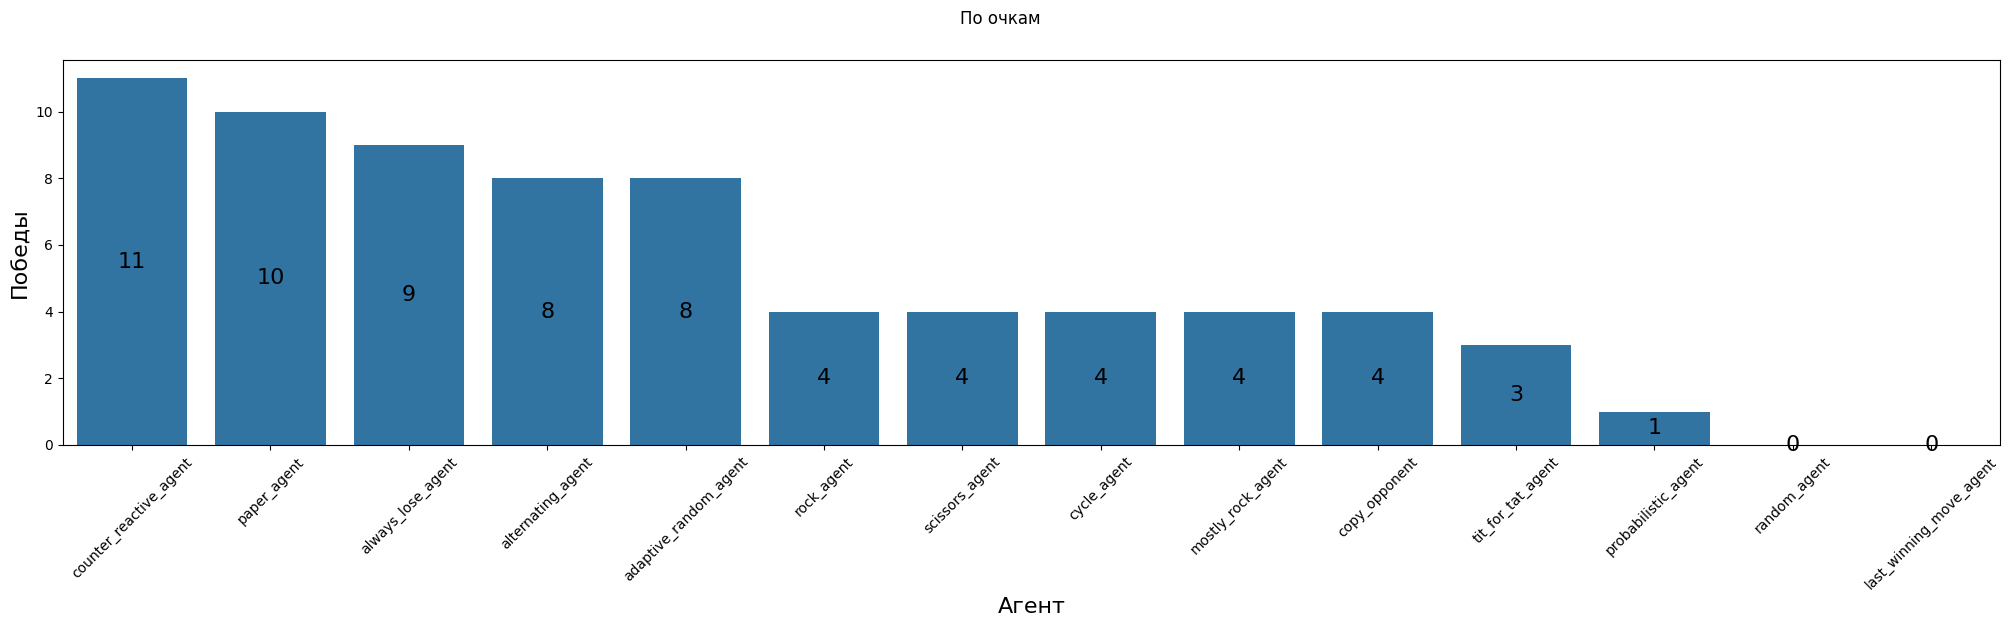

In [169]:
# сортируем win_table по количеству побед
sorted_win_table = dict(sorted(win_table.items(), key=lambda item: item[1], reverse=True))

# создаем и отображаем график c количеством побед
dfp = pd.DataFrame({"agent": sorted_win_table.keys(), "victories": sorted_win_table.values()})
plt.figure(figsize=(25, 5))
splot = sns.barplot(x="agent",y="victories",data=dfp)
plt.xlabel("Агент", size=16)
plt.ylabel("Победы", size=16)
plt.bar_label(splot.containers[0],size=16,label_type='center')
plt.suptitle('По очкам')
plt.xticks(rotation=45)
plt.show()

